<a href="https://colab.research.google.com/github/Luis-Yovera/Deteccion_infraccion_vehicular_de_estacionamiento_en_cruce_peatonal_durante_semaforo_en_rojo/blob/PRACTICAS_U3/Copia_de_Practica_10_Segmentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>PRACTICA PDI 09</font>

**Integrantes**

1. Galarreta Grados, Luis Daniel Jesús

2. Recuenco Tapia, Angie Tatiana

3. Yovera Suárez, Luis Alberto

### 1. Deteccion de puntos, lineas y bordes
* En la imagen "CieloNoc.jpg" aplique un algoritmo de deteccion de puntos, optimice su resultado umbralizando con un número adecuado (Intente obtener solo estrellas).
* En la imagen "Lineas2.png" aplique detección de lineas horizontales, diagonales, y verticales. Optimice sus resultados usando umbrales adecuados.
* Use diferentes detectores de bordes en la imagen "emma.jpg", varie sus parametros para optimizar sus resultados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

985


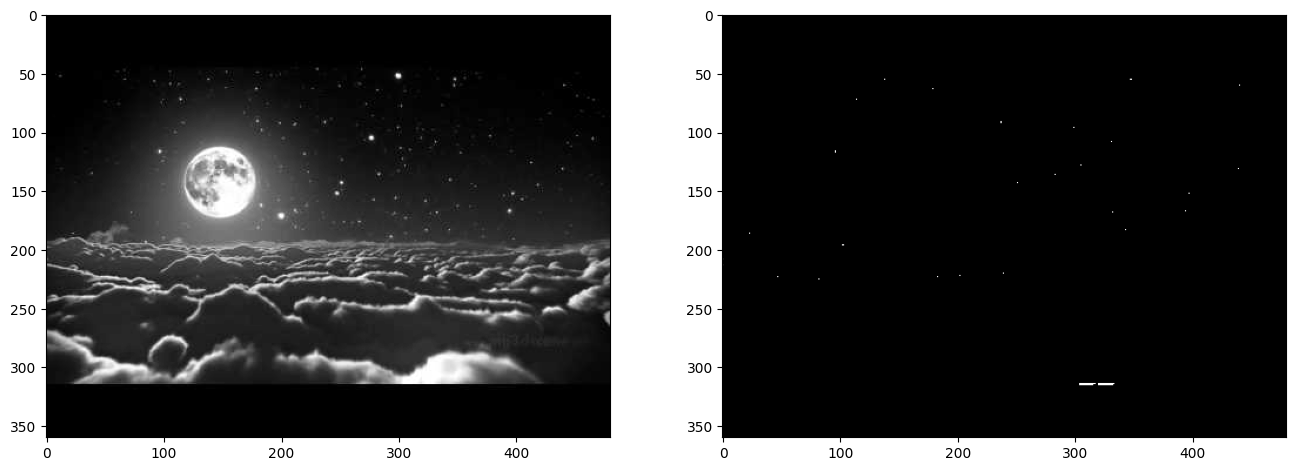

In [2]:
img = cv2.imread("/content/Imagenes/CieloNoc.jpg",0)

mask = np.array([[-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]])

imgp = signal.convolve2d(img,mask,mode='same')
umbral_max = np.amax(imgp)
print(umbral_max)

segm=np.uint8(np.abs(imgp) >= 0.7*umbral_max)

#para visualizar mejor el resultado
selem = np.ones((5,5),np.uint8)
segm_d = cv2.dilate(segm, selem)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.subplot(122)
plt.imshow(segm,cmap="gray")
plt.show()

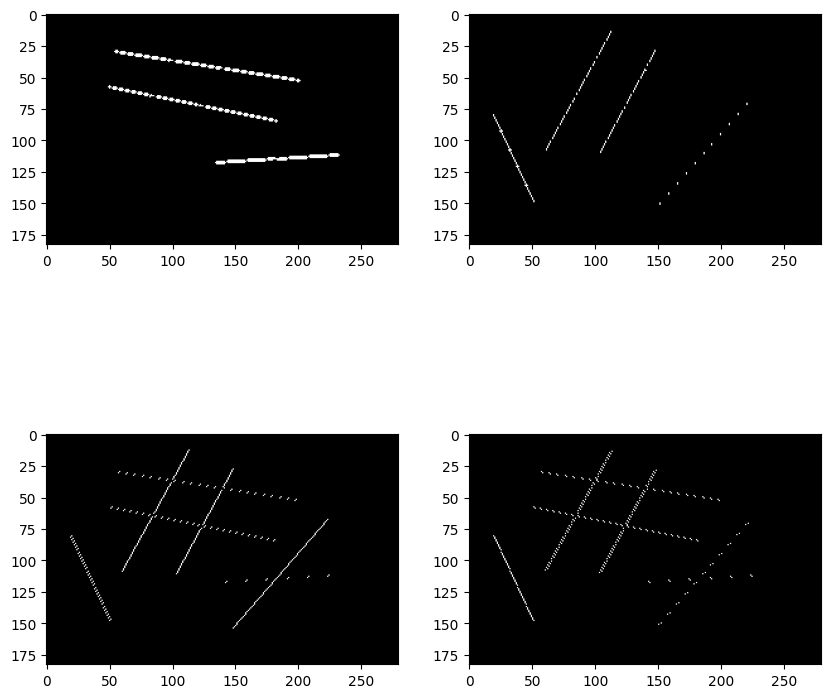

In [3]:
img = cv2.imread("/content/Imagenes/lineas1.png",0)
mask1 = np.array([[-1,-1,-1],
              [2,2,2],
              [-1,-1,-1]])

mask2=np.array([[-1,2,-1],
              [-1,2,-1],
              [-1,2,-1]])

mask3=np.array([[-1,-1,2],
              [-1,2,-1],
              [2,-1,-1]])

mask4=np.array([[2,-1,-1],
              [-1,2,-1],
              [-1,-1,2]])

linh = signal.convolve2d(img, mask1, mode='same')
linv = signal.convolve2d(img, mask2, mode='same')
lind1 = signal.convolve2d(img, mask3, mode='same')
lind2 = signal.convolve2d(img, mask4, mode='same')

umbral1 = np.amax(linh)
umbral2 = np.amax(linv)
umbral3 = np.amax(lind1)
umbral4 = np.amax(lind2)


linh = (np.abs(linh) >= 0.5 * umbral1)
linv = (np.abs(linv) >= 0.5 * umbral2)
lind1 = (np.abs(lind1) >= 0.5 * umbral3)
lind2 = (np.abs(lind2) >= 0.5 * umbral4)

fig1,ax1 = plt.subplots(2,2,figsize=(10,10))
ax1[0,0].imshow(linh, cmap="gray")
ax1[0,1].imshow(linv, cmap="gray")
ax1[1,0].imshow(lind1, cmap="gray")
ax1[1,1].imshow(lind2, cmap="gray")
plt.show()

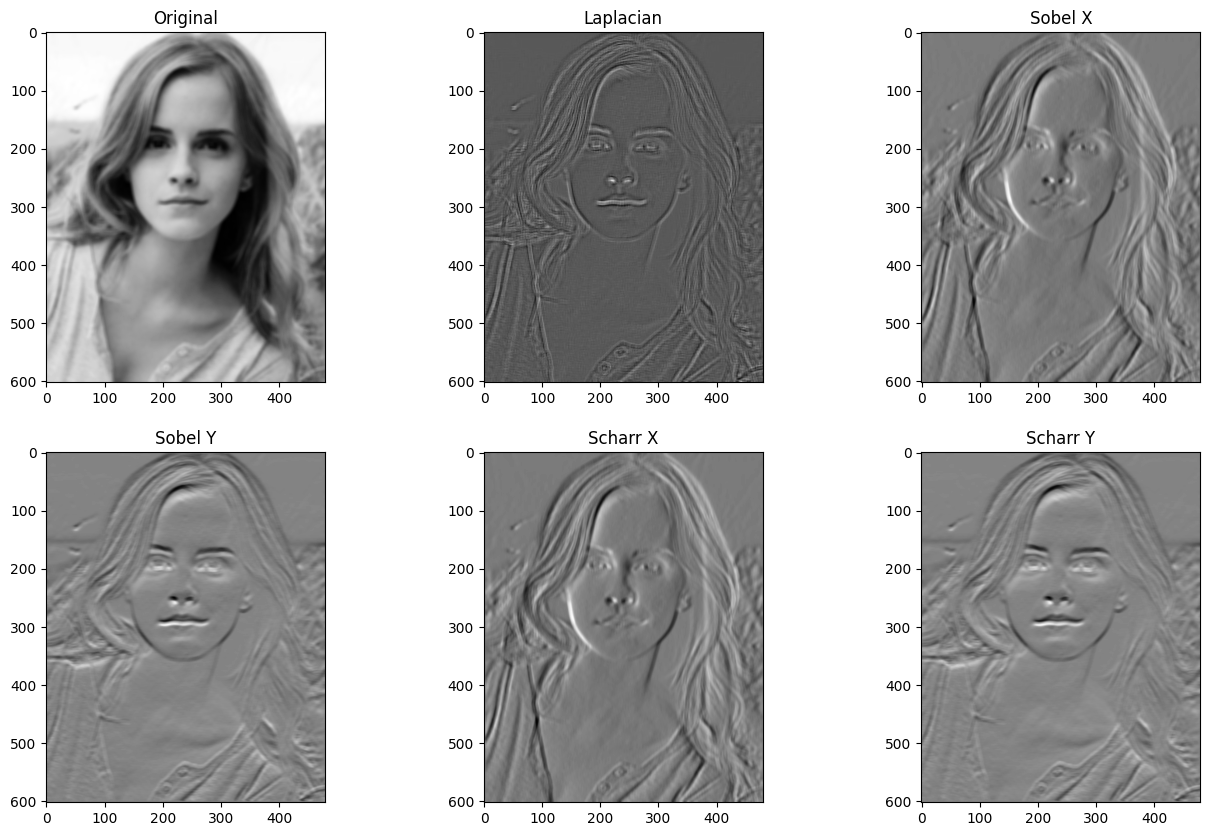

In [4]:
gray = cv2.imread("/content/Imagenes/emma.jpg",0)/255

img = cv2.blur(gray, (7,7))

laplacian = cv2.Laplacian(img,cv2.CV_64F)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)


plt.figure(figsize=(16,10))
plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.subplot(2,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.subplot(2,3,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(2,3,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.subplot(2,3,5),plt.imshow(scharrx,cmap = 'gray')
plt.title('Scharr X')
plt.subplot(2,3,6),plt.imshow(scharry,cmap = 'gray')
plt.title('Scharr Y')
plt.show()

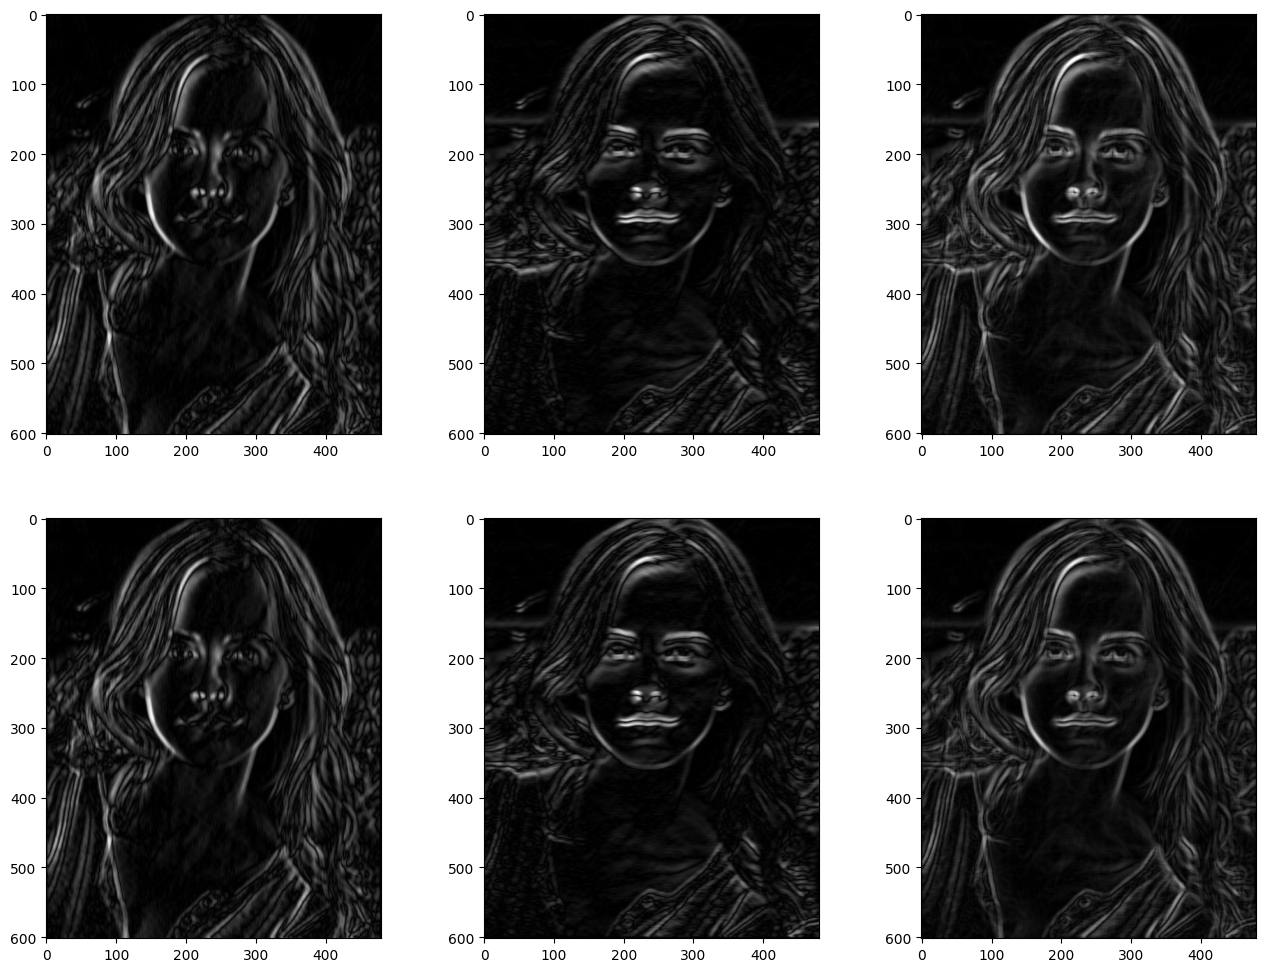

In [5]:
sobelx_pos = np.abs(sobelx)
sobely_pos = np.abs(sobely)

scharrx_pos = np.abs(scharrx)
scharry_pos = np.abs(scharry)

plt.figure(figsize=(16,12))

plt.subplot(231),plt.imshow(sobelx_pos,cmap = 'gray')
plt.subplot(232),plt.imshow(sobely_pos,cmap = 'gray')
plt.subplot(233),plt.imshow(sobelx_pos+sobely_pos,cmap = 'gray', vmin=0, vmax=1)

plt.subplot(234),plt.imshow(scharrx_pos,cmap = 'gray')
plt.subplot(235),plt.imshow(scharry_pos,cmap = 'gray')
plt.subplot(236),plt.imshow(scharrx_pos+scharry_pos,cmap = 'gray')
plt.show()

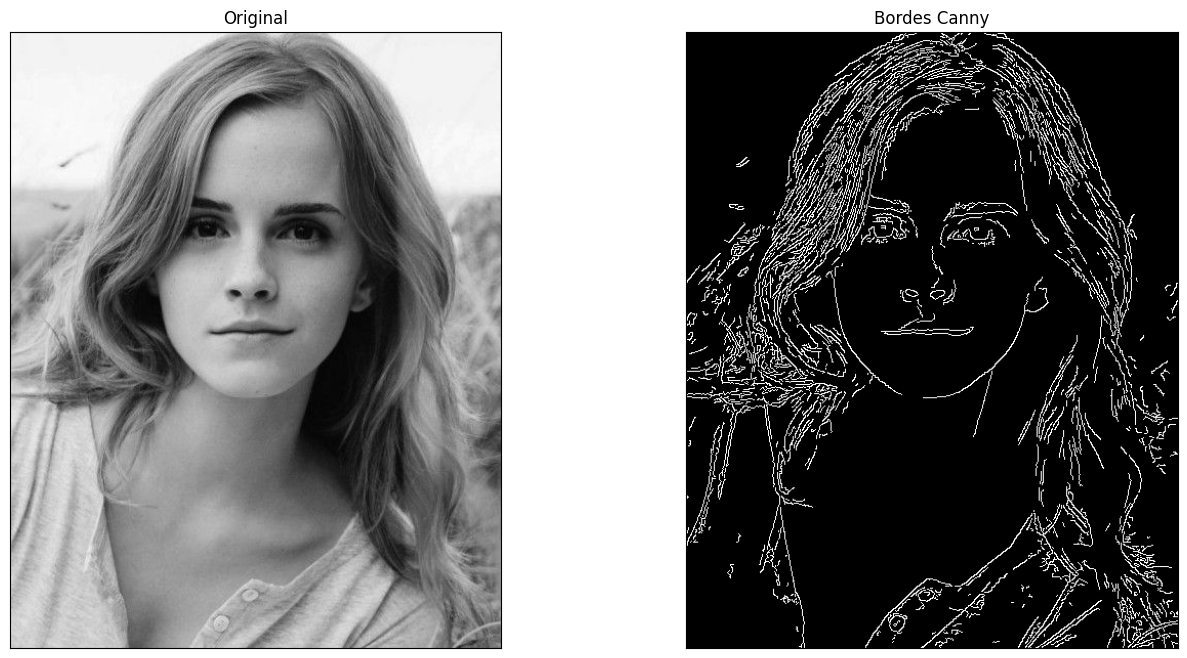

In [7]:
#Canny
#https://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html
img = cv2.imread('/content/Imagenes/emma.jpg',0)
edges = cv2.Canny(img, 90, 150)

plt.figure(figsize=(16,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray', vmin=0, vmax=256)
plt.title('Bordes Canny'), plt.xticks([]), plt.yticks([])
plt.show()

### 2. Haga uso de la transformada de hough para la deteccion de lineas y circulos
* Analize el codigo siguiente y comente cada linea, luego busque las 2 lineas mas grandes en en la imagen "TajMahal.jpg". Utilize el detector de bordes previamente

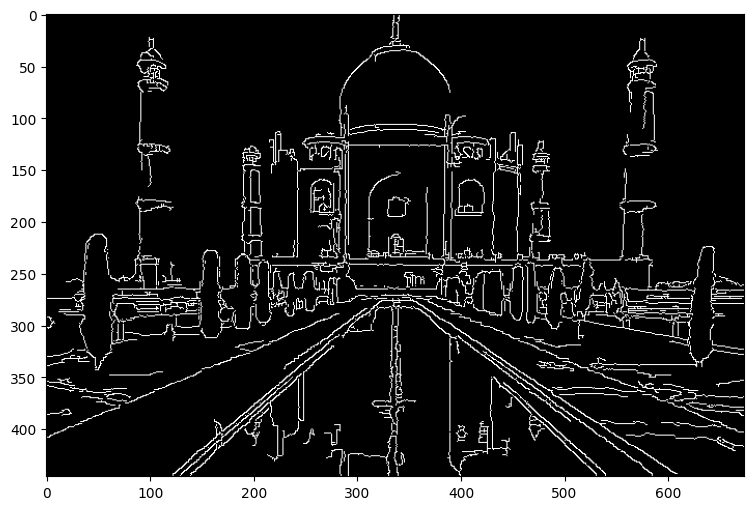

In [8]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
gray = cv2.imread("/content/Imagenes/TajMahal.jpg",0)

gray = cv2.blur(gray, (5,5))

edges = cv2.Canny(gray,20,180)

plt.figure(figsize=(12,6))
plt.imshow(edges, cmap='gray')
plt.show()

In [9]:
lines

NameError: name 'lines' is not defined

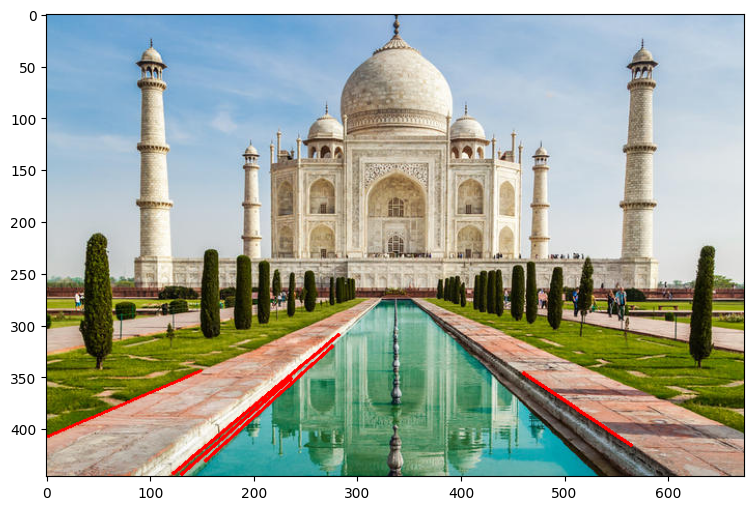

In [10]:
#https://stackoverflow.com/questions/45322630/how-to-detect-lines-in-opencv
# rho = 1  # distance resolution in pixels of the Hough grid
# theta = np.pi / 180  # angular resolution in radians of the Hough grid
# threshold = 15  # minimum number of votes (intersections in Hough grid cell)
# min_line_length = 50  # minimum number of pixels making up a line
# max_line_gap = 20  # maximum gap in pixels between connectable line segments
# line_image = np.copy(img) * 0  # creating a blank to draw lines on

# # Run Hough on edge detected image
# # Output "lines" is an array containing endpoints of detected line segments
# lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
#                     min_line_length, max_line_gap)

color = cv2.imread("/content/Imagenes/TajMahal.jpg")

lines = cv2.HoughLinesP(edges, 2, np.pi/180, 250, minLineLength=100, maxLineGap=5)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(color, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(12,6))
plt.imshow(color[...,::-1])
plt.show()

In [11]:
circles

NameError: name 'circles' is not defined

https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html

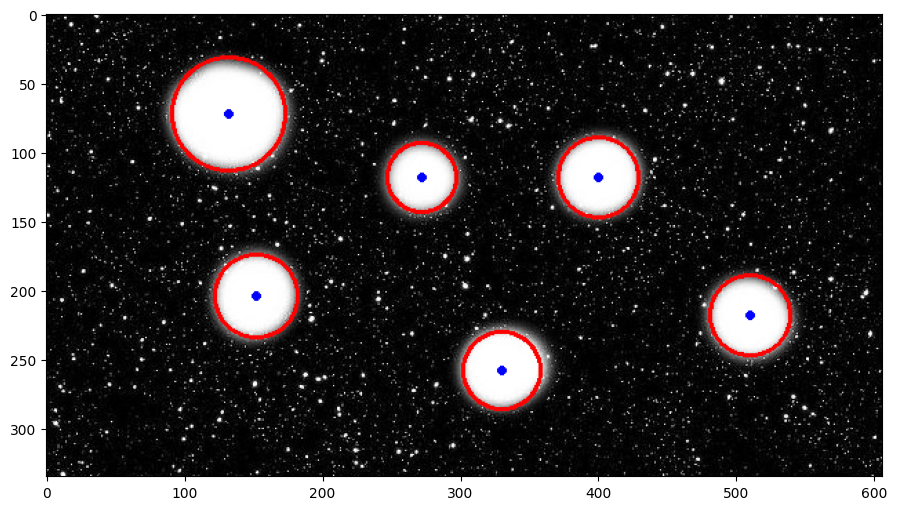

In [13]:
img = cv2.imread('/content/Imagenes/Cosmos.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(gray, 11)

circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/10,
                           param1=200, param2=50, minRadius=5, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0]:
        cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 2)
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 2)

plt.figure(figsize=(12, 6))
plt.imshow(img)

### 3. Binarizacion basada en umbrales
* Use todos los tipos de umbrales disponibes en OpenCv y compare con sus umbrales inversos
* Use la umbralización por el metodo de Otsu
* Use segmentacaion adaptativa para obtener mejores resultados
 https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576ac7e89a5e95490116e7d2082b3096b2b8

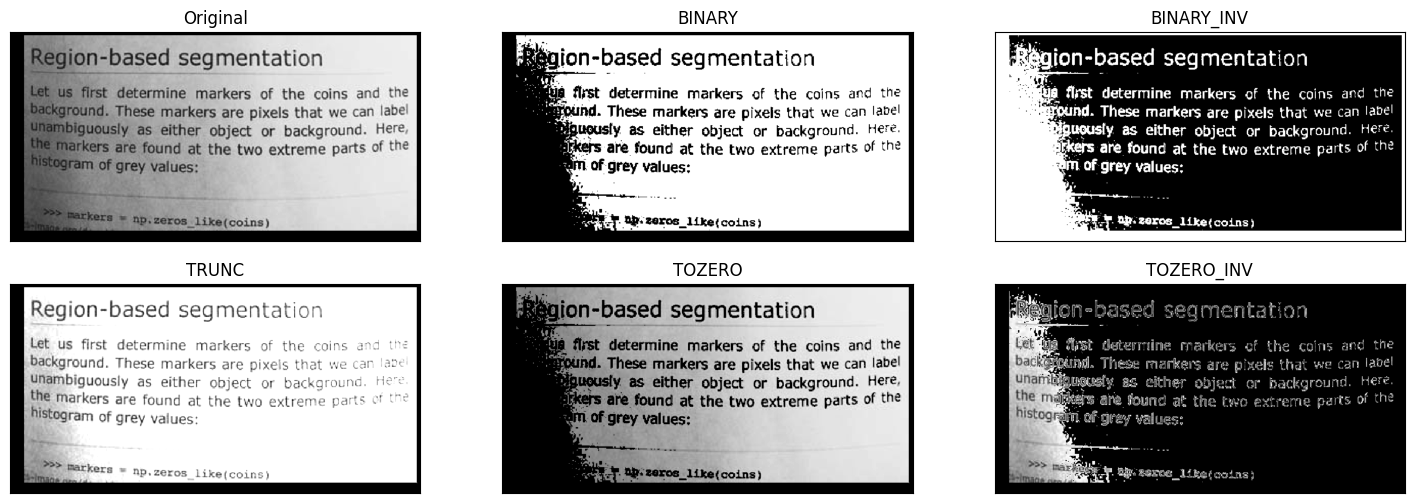

In [14]:
img = cv2.imread('/content/Imagenes/text_ilu.png',0)

_,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
_,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
_,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
_,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
_,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(18,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

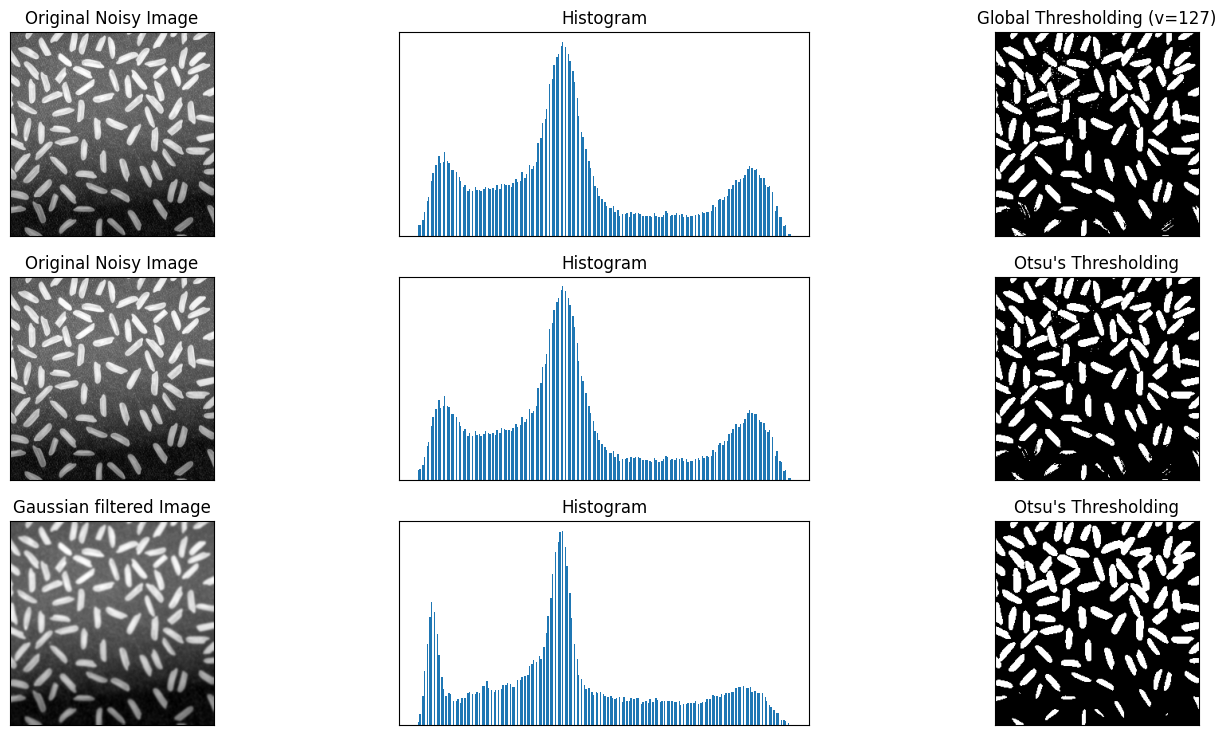

In [15]:
#Umbralizacion por el metodo de Otsu
img = cv2.imread('/content/Imagenes/rice.png',0)

# Umbralizacion global
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Suavizado + Otsu
blur = cv2.GaussianBlur(img,(5,5),0)
_,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Mostrar graficas e histogramas
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(18,9))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

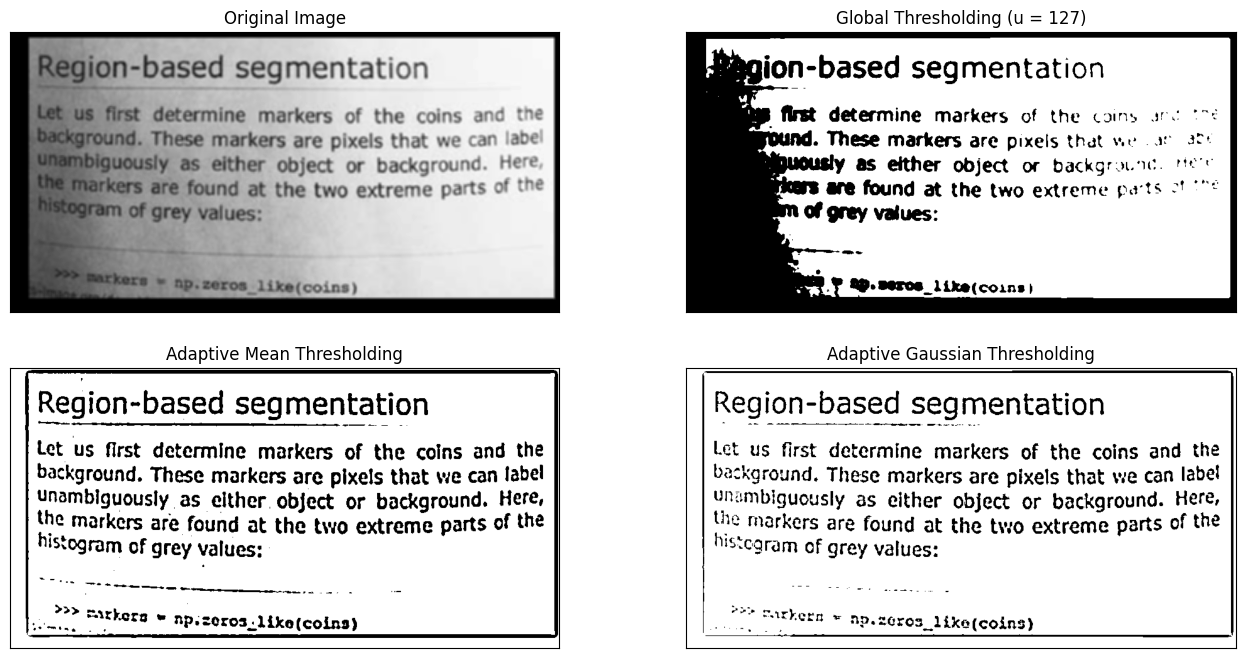

In [16]:
#Umbralización adaptativa  https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3
img = cv2.imread('/content/Imagenes/text_ilu.png',0)
img = cv2.blur(img,(5,5))

_,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,7)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,7)

titles = ['Original Image', 'Global Thresholding (u = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 4. Segmentación Watersheed
* Aplique la segmentacion watersheed a la imagen "monedas.jpg"

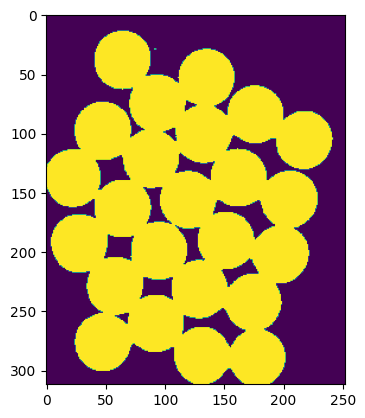

In [17]:
img = cv2.imread("/content/Imagenes/monedas.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh)

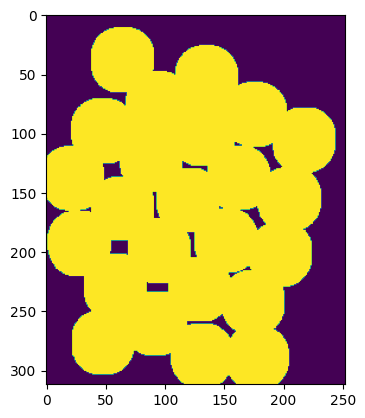

In [18]:
# Limpiar ruido
selem = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,selem, iterations = 3)

# Zona segura de fondo
kernel = np.ones((3,3))
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg)

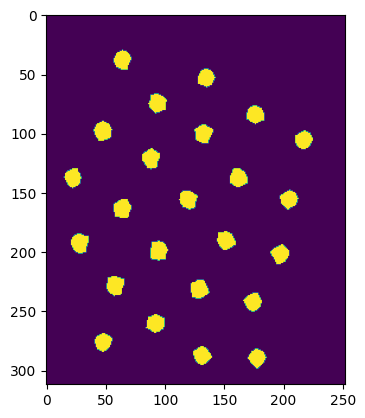

In [19]:
# Zona segura de primer plano
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
_, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg)

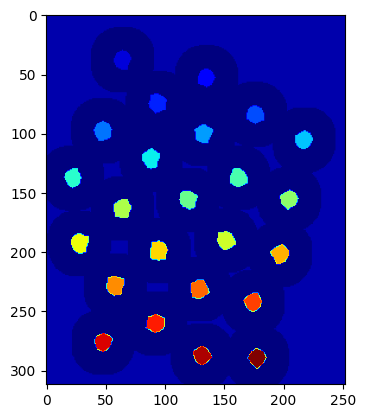

In [20]:
# Region desconocida
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Etiquetando elementos
_, markers = cv2.connectedComponents(sure_fg)

# # Sumar 1 a las etiquetas para la numeracion inicie en 1
markers = markers+1

# # # Marcamos la zona desconocida con la etiqueta 0
markers[unknown==255] = 0

plt.imshow(markers, cmap="jet")

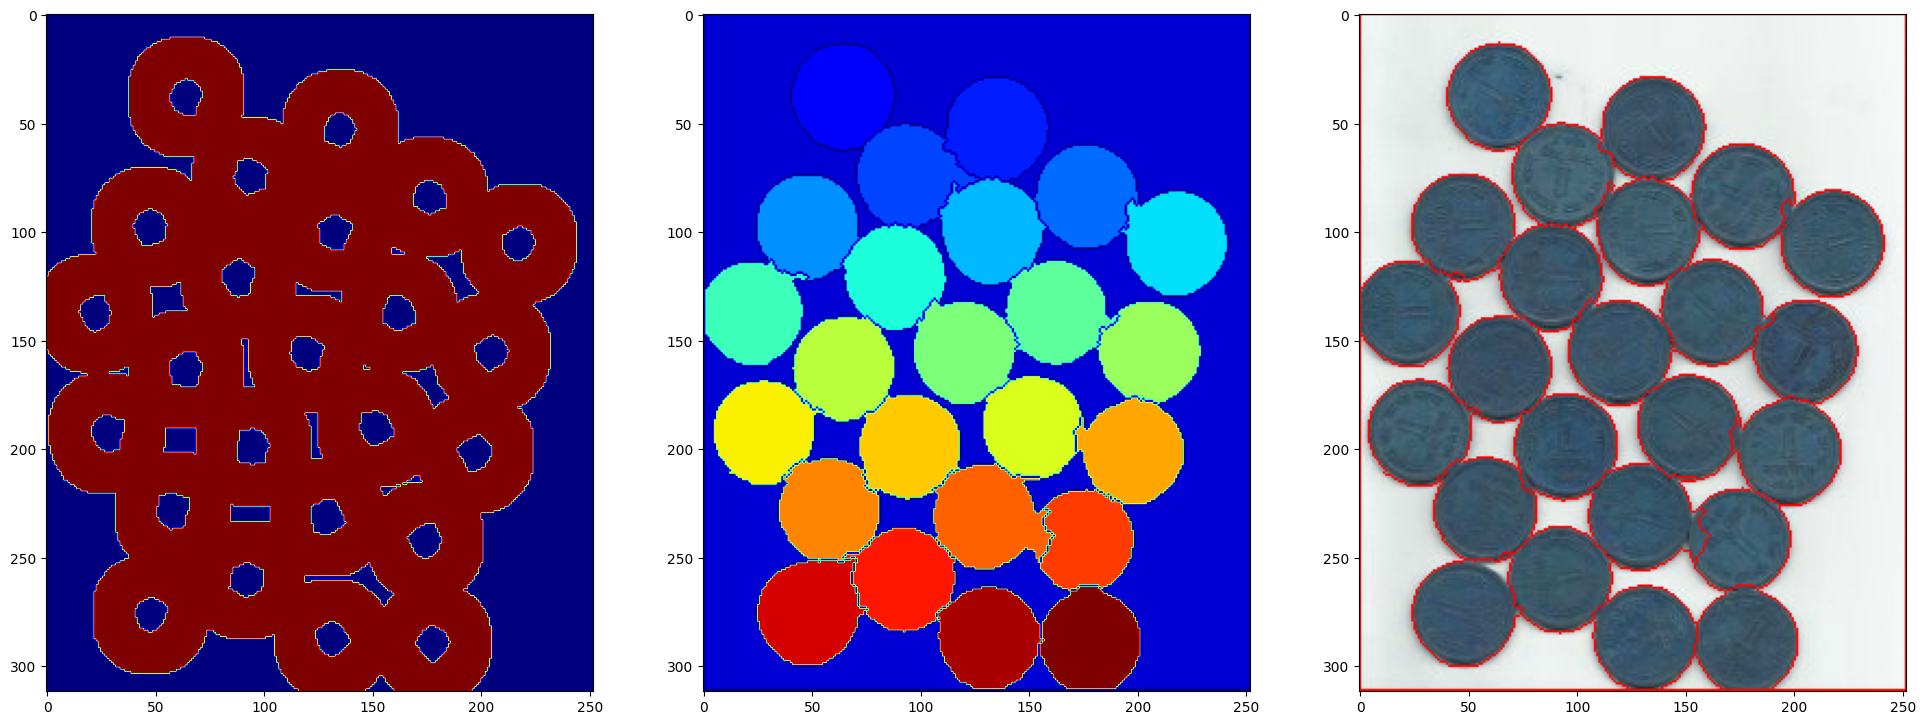

In [21]:
#https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html

#Aplicamos la transformacion watersheed
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.figure(figsize=(24,16))
plt.subplot(131)
plt.imshow(unknown, cmap="jet")
plt.subplot(132)
plt.imshow(markers, cmap="jet")
plt.subplot(133)
plt.imshow(img)
plt.show()